In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

# Problem Statement 


The dataset provided is related to IMDB Movies. A potential problem to investigate could be: "What factors influence 
    
the success of a movie on IMDB?" Here, success can be defined by high IMDB ratings. The impact of this problem is significant

for movie producers, directors, and investors who want to understand what makes a movie successful to make informed decisions

in their future projects. Consider this as an open ended question and come up with more analysis points. 

# Data Cleaning and Exploration

# Read the dataset using Pandas

In [36]:
df=pd.read_csv(r"C:\Users\SKAN\Downloads\IMDB_Movies (1).csv")

In [37]:
df

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5038                      2.0                   318.0     Daphne Zuniga   
5039                      NaN                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
5038                   637.0          NaN                     Comedy|Drama   
5039                   841.0          NaN     Crime|Drama|Mystery|Thriller   
5040                     0.0          NaN            Drama|Horror|Thriller   
5041                   946.0      10443.0             Comedy|Drama|Romance   
5042                    86.0      85222.0                      Documentary   

         actor_1_name                                        movie_title  \
0         CCH Pounder                                            Avatar    
1         Johnny Depp          Pirates of the Caribbean: At World's End    
2     Christoph Waltz                                           Spectre    
3           Tom Hardy                             The Dark Knight Rises    
4         Doug Walker  Star Wars: Episode VII - The Force Awakens    ...   
...               ...                                                ...   
5038      Eric Mabius                           Signed Sealed Delivered    
5039      Natalie Zea                         The Following                
5040      Eva Boehnke                              A Plague So Pleasant    
5041        Alan Ruck                                  Shanghai Calling    
5042      John August                                 My Date with Drew    

      num_voted_users  cast_total_facebook_likes          actor_3_name  \
0              886204                       4834             Wes Studi   
1              471220                      48350        Jack Davenport   
2              275868                      11700      Stephanie Sigman   
3             1144337                     106759  Joseph Gordon-Levitt   
4                   8                        143                   N

In [38]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [39]:
df.shape

(5043, 28)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

# Checking Null Values and Duplicate values

In [41]:
df.isnull().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          20
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [42]:
def missing_check(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.isnull().count().sort_values(ascending=False))
    missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    return missing_data
missing_check(df)

Total   Percent
gross                        884  0.175292
budget                       492  0.097561
aspect_ratio                 329  0.065239
content_rating               303  0.060083
plot_keywords                153  0.030339
title_year                   108  0.021416
director_name                104  0.020623
director_facebook_likes      104  0.020623
num_critic_for_reviews        50  0.009915
actor_3_name                  23  0.004561
actor_3_facebook_likes        23  0.004561
num_user_for_reviews          20  0.003966
color                         19  0.003768
duration                      15  0.002974
facenumber_in_poster          13  0.002578
actor_2_name                  13  0.002578
actor_2_facebook_likes        13  0.002578
language                      12  0.002380
actor_1_name                   7  0.001388
actor_1_facebook_likes         7  0.001388
country                        5  0.000991
cast_total_facebook_likes      0  0.000000
num_voted_users                0  0.000000
movie_title                    0  0.000000
movie_imdb_link                0  0.000000
genres                         0  0.000000
imdb_score                     0  0.000000
movie_facebook_likes           0  0.000000

columns gross,budget,aspect_ratio,content_ratio,content_rating,plot_keywords,title_year,director_name,director_facebook_likes,

num_critic_for_reviews,actor_3_name,actor_3_facebook_likes,color,duration,facenumber_in_poster,actor_2_name,

actor_2_facebook_likes,language,actor_1_name,actor_1_facebook_likes,country have missing values.


In [43]:
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [45]:
df.shape

(3756, 28)

In [46]:
df.duplicated().sum()

33

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
df.duplicated().sum()

0

In [49]:
df["title_year"]=pd.to_datetime(df["title_year"])

In [50]:
df.dtypes

color                                object
director_name                        object
num_critic_for_reviews              float64
duration                            float64
director_facebook_likes             float64
actor_3_facebook_likes              float64
actor_2_name                         object
actor_1_facebook_likes              float64
gross                               float64
genres                               object
actor_1_name                         object
movie_title                          object
num_voted_users                       int64
cast_total_facebook_likes             int64
actor_3_name                         object
facenumber_in_poster                float64
plot_keywords                        object
movie_imdb_link                      object
num_user_for_reviews                 object
language                             object
country                              object
content_rating                       object
budget                          

In [19]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtype=='object'))]
categorical_features

['color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating']

In [20]:
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


color
['Color' ' Black and White']

director_name
['James Cameron' 'Gore Verbinski' 'Sam Mendes' ... 'Kevin Jordan'
 'Jafar Panahi' 'Shane Carruth']

actor_2_name
['Joel David Moore' 'Orlando Bloom' 'Rory Kinnear' ... 'David Sullivan'
 'Peter Marquardt' 'Brian Herzlinger']

genres
['Action|Adventure|Fantasy|Sci-Fi' 'Action|Adventure|Fantasy'
 'Action|Adventure|Thriller' 'Action|Thriller' 'Action|Adventure|Sci-Fi'
 'Action|Adventure|Romance'
 'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance'
 'Adventure|Family|Fantasy|Mystery' 'Action|Adventure'
 'Action|Adventure|Western' 'Action|Adventure|Family|Fantasy'
 'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi' 'Adventure|Fantasy'
 'Action|Adventure|Drama|History' 'Adventure|Family|Fantasy'
 'Action|Adventure|Drama|Romance' 'Drama|Romance'
 'Action|Adventure|Sci-Fi|Thriller' 'Action|Adventure|Fantasy|Romance'
 'Action|Adventure|Fantasy|Sci-Fi|Thriller'
 'Adventure|Animation|Comedy|Family|Fantasy'
 'Adventure|Animation|Comedy|Family|

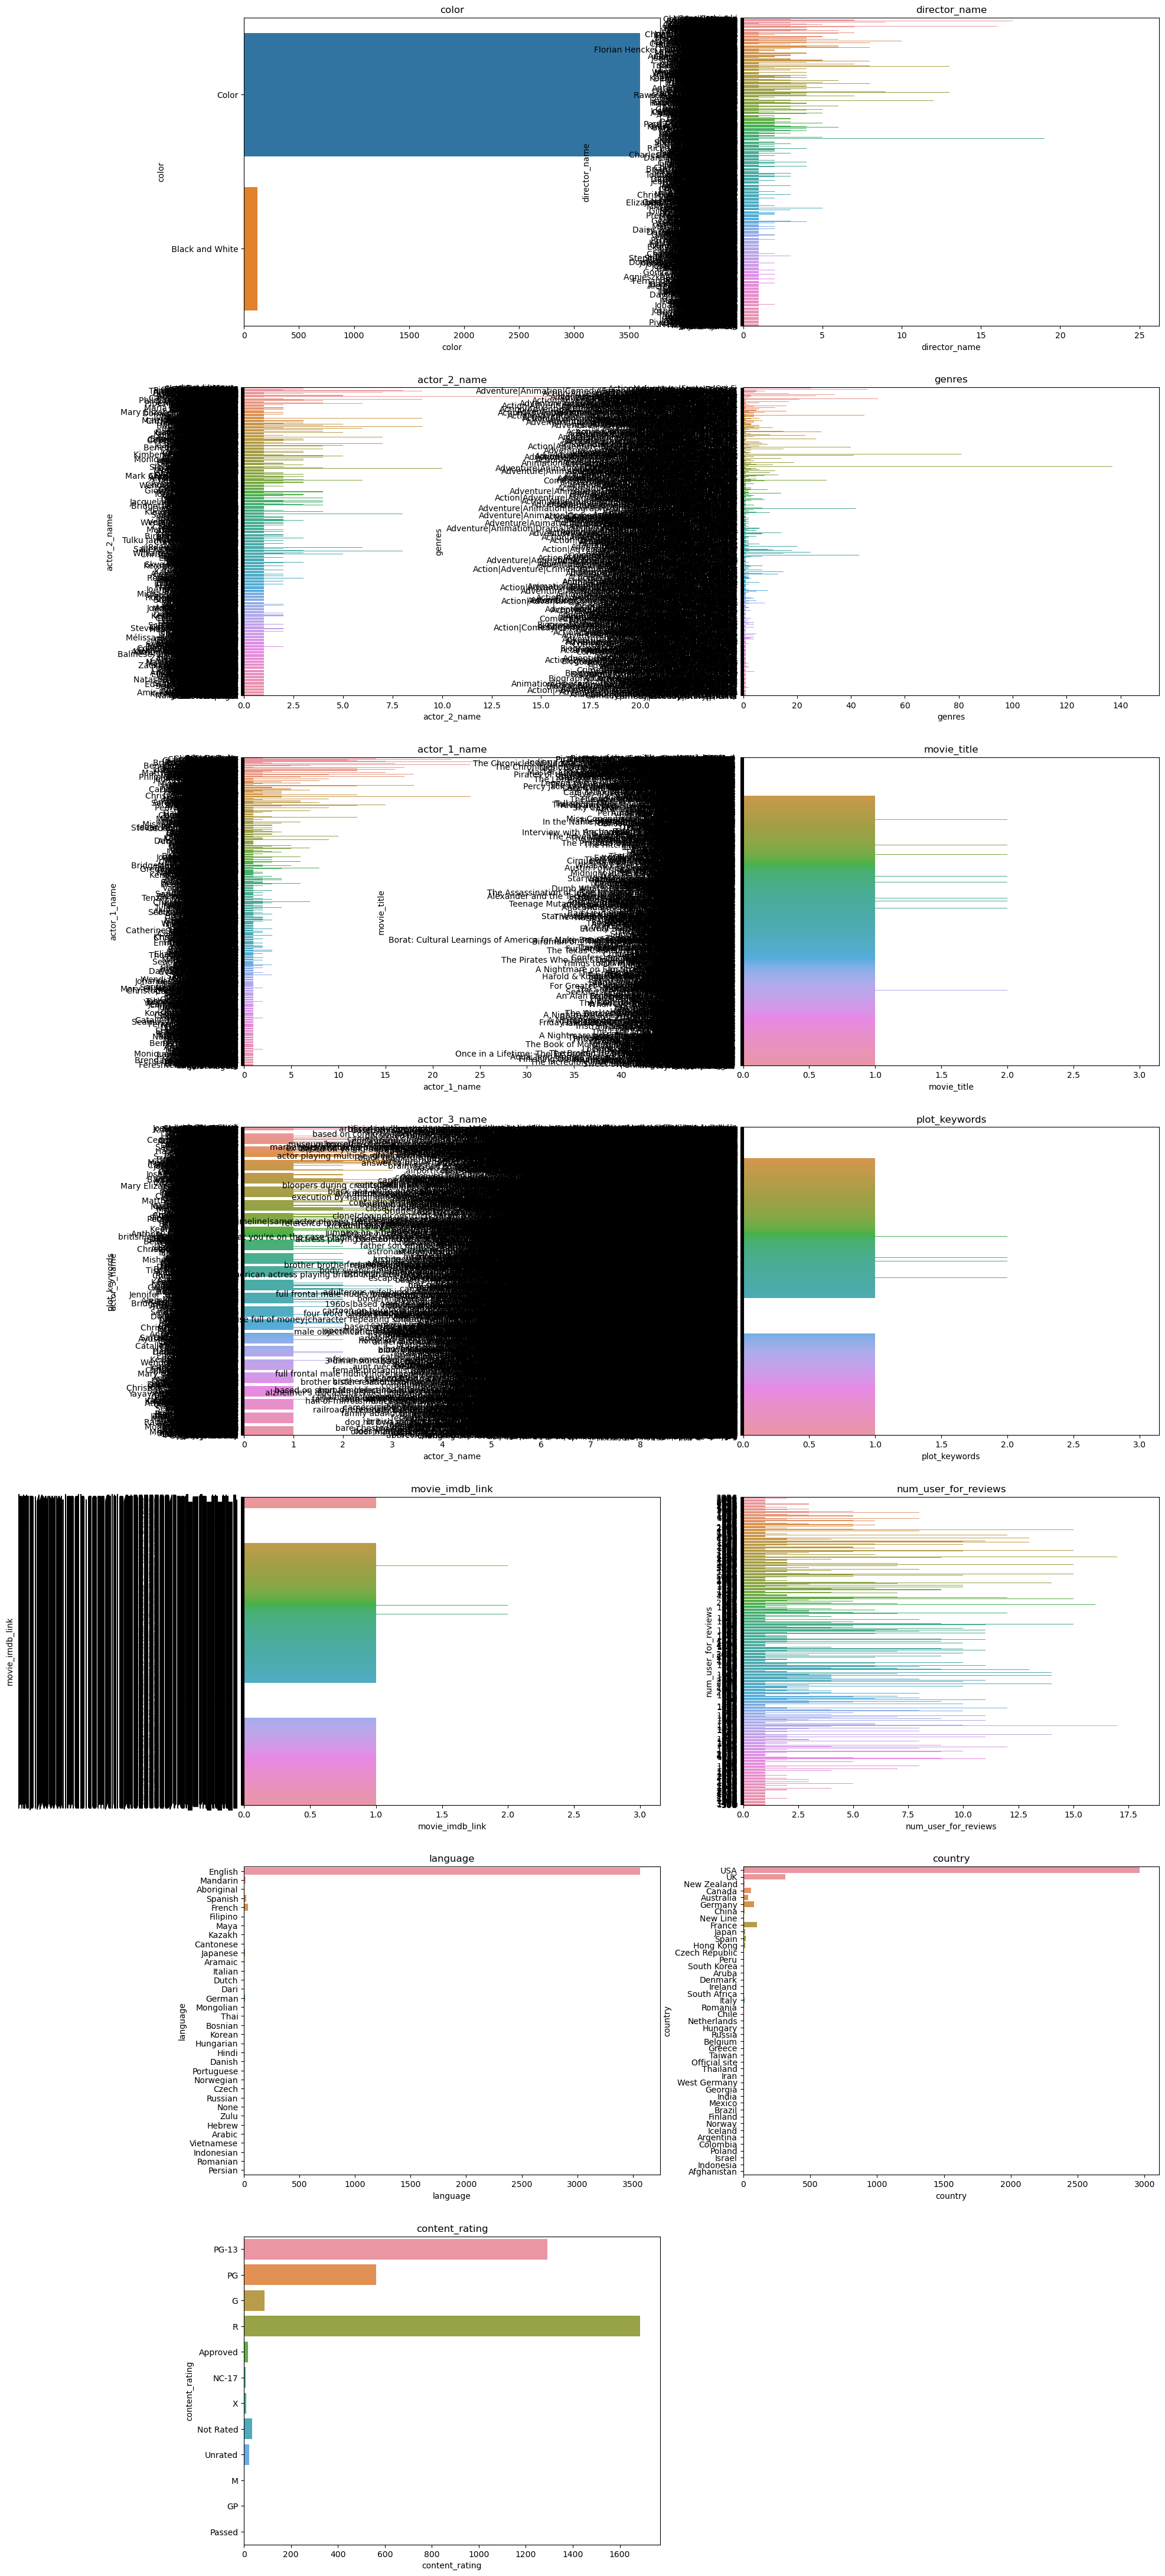

In [21]:
plt.figure(figsize=(20,80))
plot=1
for i in categorical_features:
    ax=plt.subplot(10,2,plot)
    sns.countplot(y=i,data=df)
    plt.xlabel(i)
    plt.title(i)
    plot+=1
    plt.show

In [23]:
Numerical_features=[feature for feature in df.columns if ((df[feature].dtype!='object'))]
Numerical_features

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

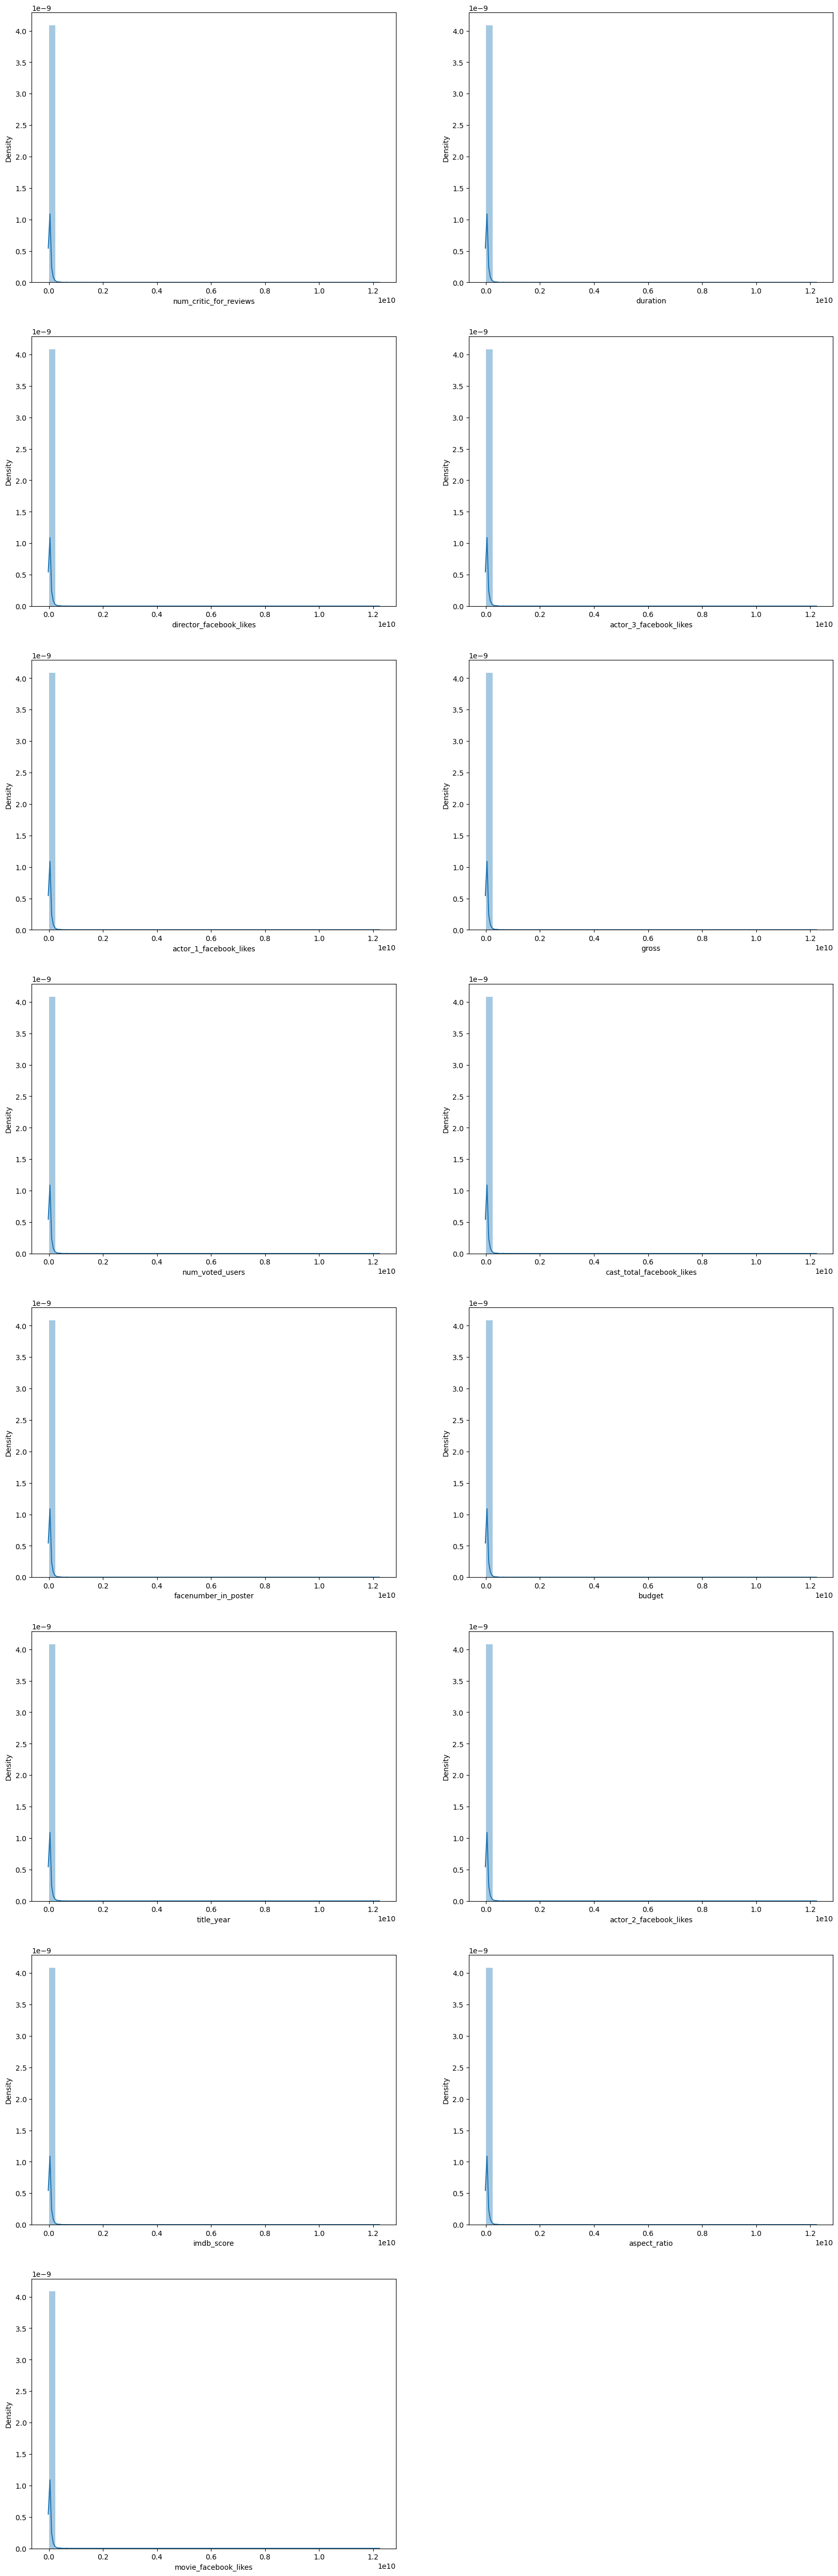

In [36]:
plt.figure(figsize=(20,80))
plot=1
for i in Numerical_features:
    ax=plt.subplot(10,2,plot)
    sns.distplot(df[Numerical_features])
    plt.xlabel(i)
    plot+=1
    plt.show

In [24]:
df.corr()

num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.227619   
duration                                 0.227619  1.000000   
director_facebook_likes                  0.175715  0.180397   
actor_3_facebook_likes                   0.245440  0.120776   
actor_1_facebook_likes                   0.165648  0.082901   
gross                                    0.460797  0.242610   
num_voted_users                          0.591586  0.338953   
cast_total_facebook_likes                0.233781  0.117736   
facenumber_in_poster                    -0.035603  0.027522   
budget                                   0.103921  0.067380   
actor_2_facebook_likes                   0.251119  0.126651   
imdb_score                               0.349825  0.367388   
aspect_ratio                             0.179809  0.153353   
movie_facebook_likes                     0.703579  0.212977   

                           director_facebook_likes  actor_3_facebook_likes  \
num_critic_for_reviews                    0.175715                0.245440   
duration                                  0.180397                0.120776   
director_facebook_likes                   1.000000                0.120584   
actor_3_facebook_likes                    0.120584                1.000000   
actor_1_facebook_likes                    0.090467                0.252450   
gross                                     0.139729                0.281238   
num_voted_users                           0.302766                0.257632   
cast_total_facebook_likes                 0.120076                0.485596   
facenumber_in_poster                     -0.047577                0.104853   
budget                                    0.018105                0.038207   
actor_2_facebook_likes                    0.117858                0.550328   
imdb_score                                0.193125                0.064187   
aspect_ratio                              0.037171                0.047918   
movie_facebook_likes                      0.162641                0.259922   

                           actor_1_facebook_likes     gross  num_voted_users  \
num_critic_for_reviews                   0.165648  0.460797         0.591586   
duration                                 0.082901  0.242610         0.338953   
director_facebook_likes                  0.090467  0.139729         0.302766   
actor_3_facebook_likes                   0.252450  0.281238         0.257632   
actor_1_facebook_likes                   1.000000  0.142577         0.178009   
gross                                    0.142577  1.000000         0.622714   
num_voted_users                          0.178009  0.622714         1.000000   
cast_total_facebook_likes                0.946075  0.227955         0.243834   
facenumber_in_poster                     0.055769 -0.034389        -0.035822   
budget                                   0.016027  0.098318         0.065398   
actor_2_facebook_likes                   0.390411  0.243977         0.239126   
imdb_score                               0.092927  0.215510         0.482583   
aspect_ratio                             0.056816  0.065903         0.087079   
movie_facebook_likes                     0.128804  0.358630         0.514855   

                           cast_total_facebook_likes  facenumber_in_poster  \
num_critic_for_reviews                      0.233781             -0.035603   
duration                                    0.117736              0.027522   
director_facebook_likes                     0.120076             -0.047577   
actor_3_facebook_likes                      0.485596              0.104853   
actor_1_facebook_likes                      0.946075              0.055769   
gross                                       0.227955             -0.034389   
num_voted_users                             0.243834             -0.035822   
cast_total_facebook_likes                   1.000000              0.078250   
facenum

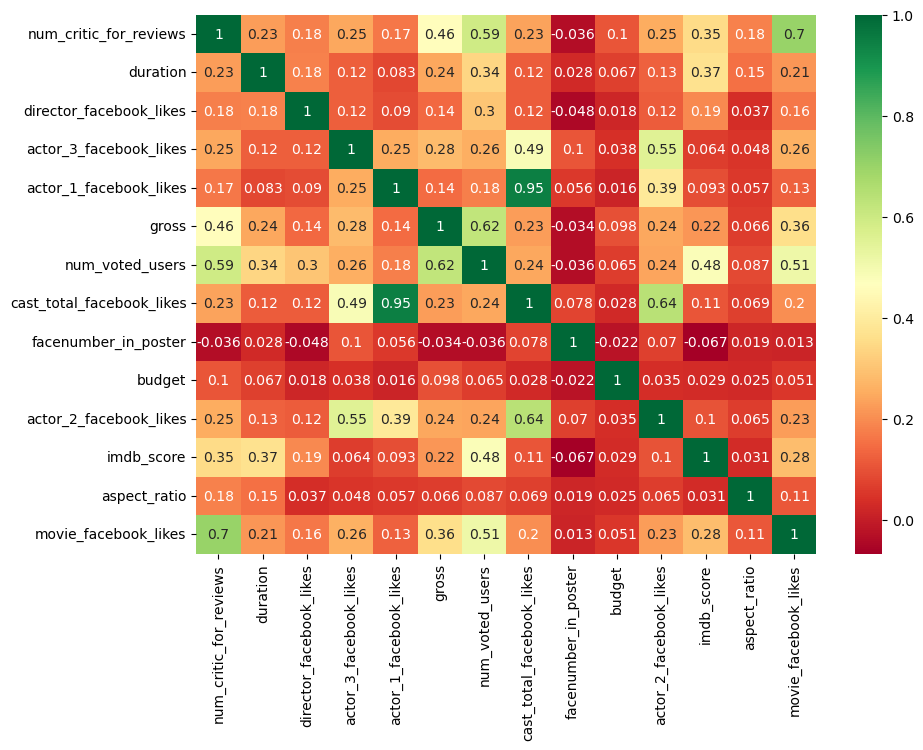

In [25]:
#get correlations of selected features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,7))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

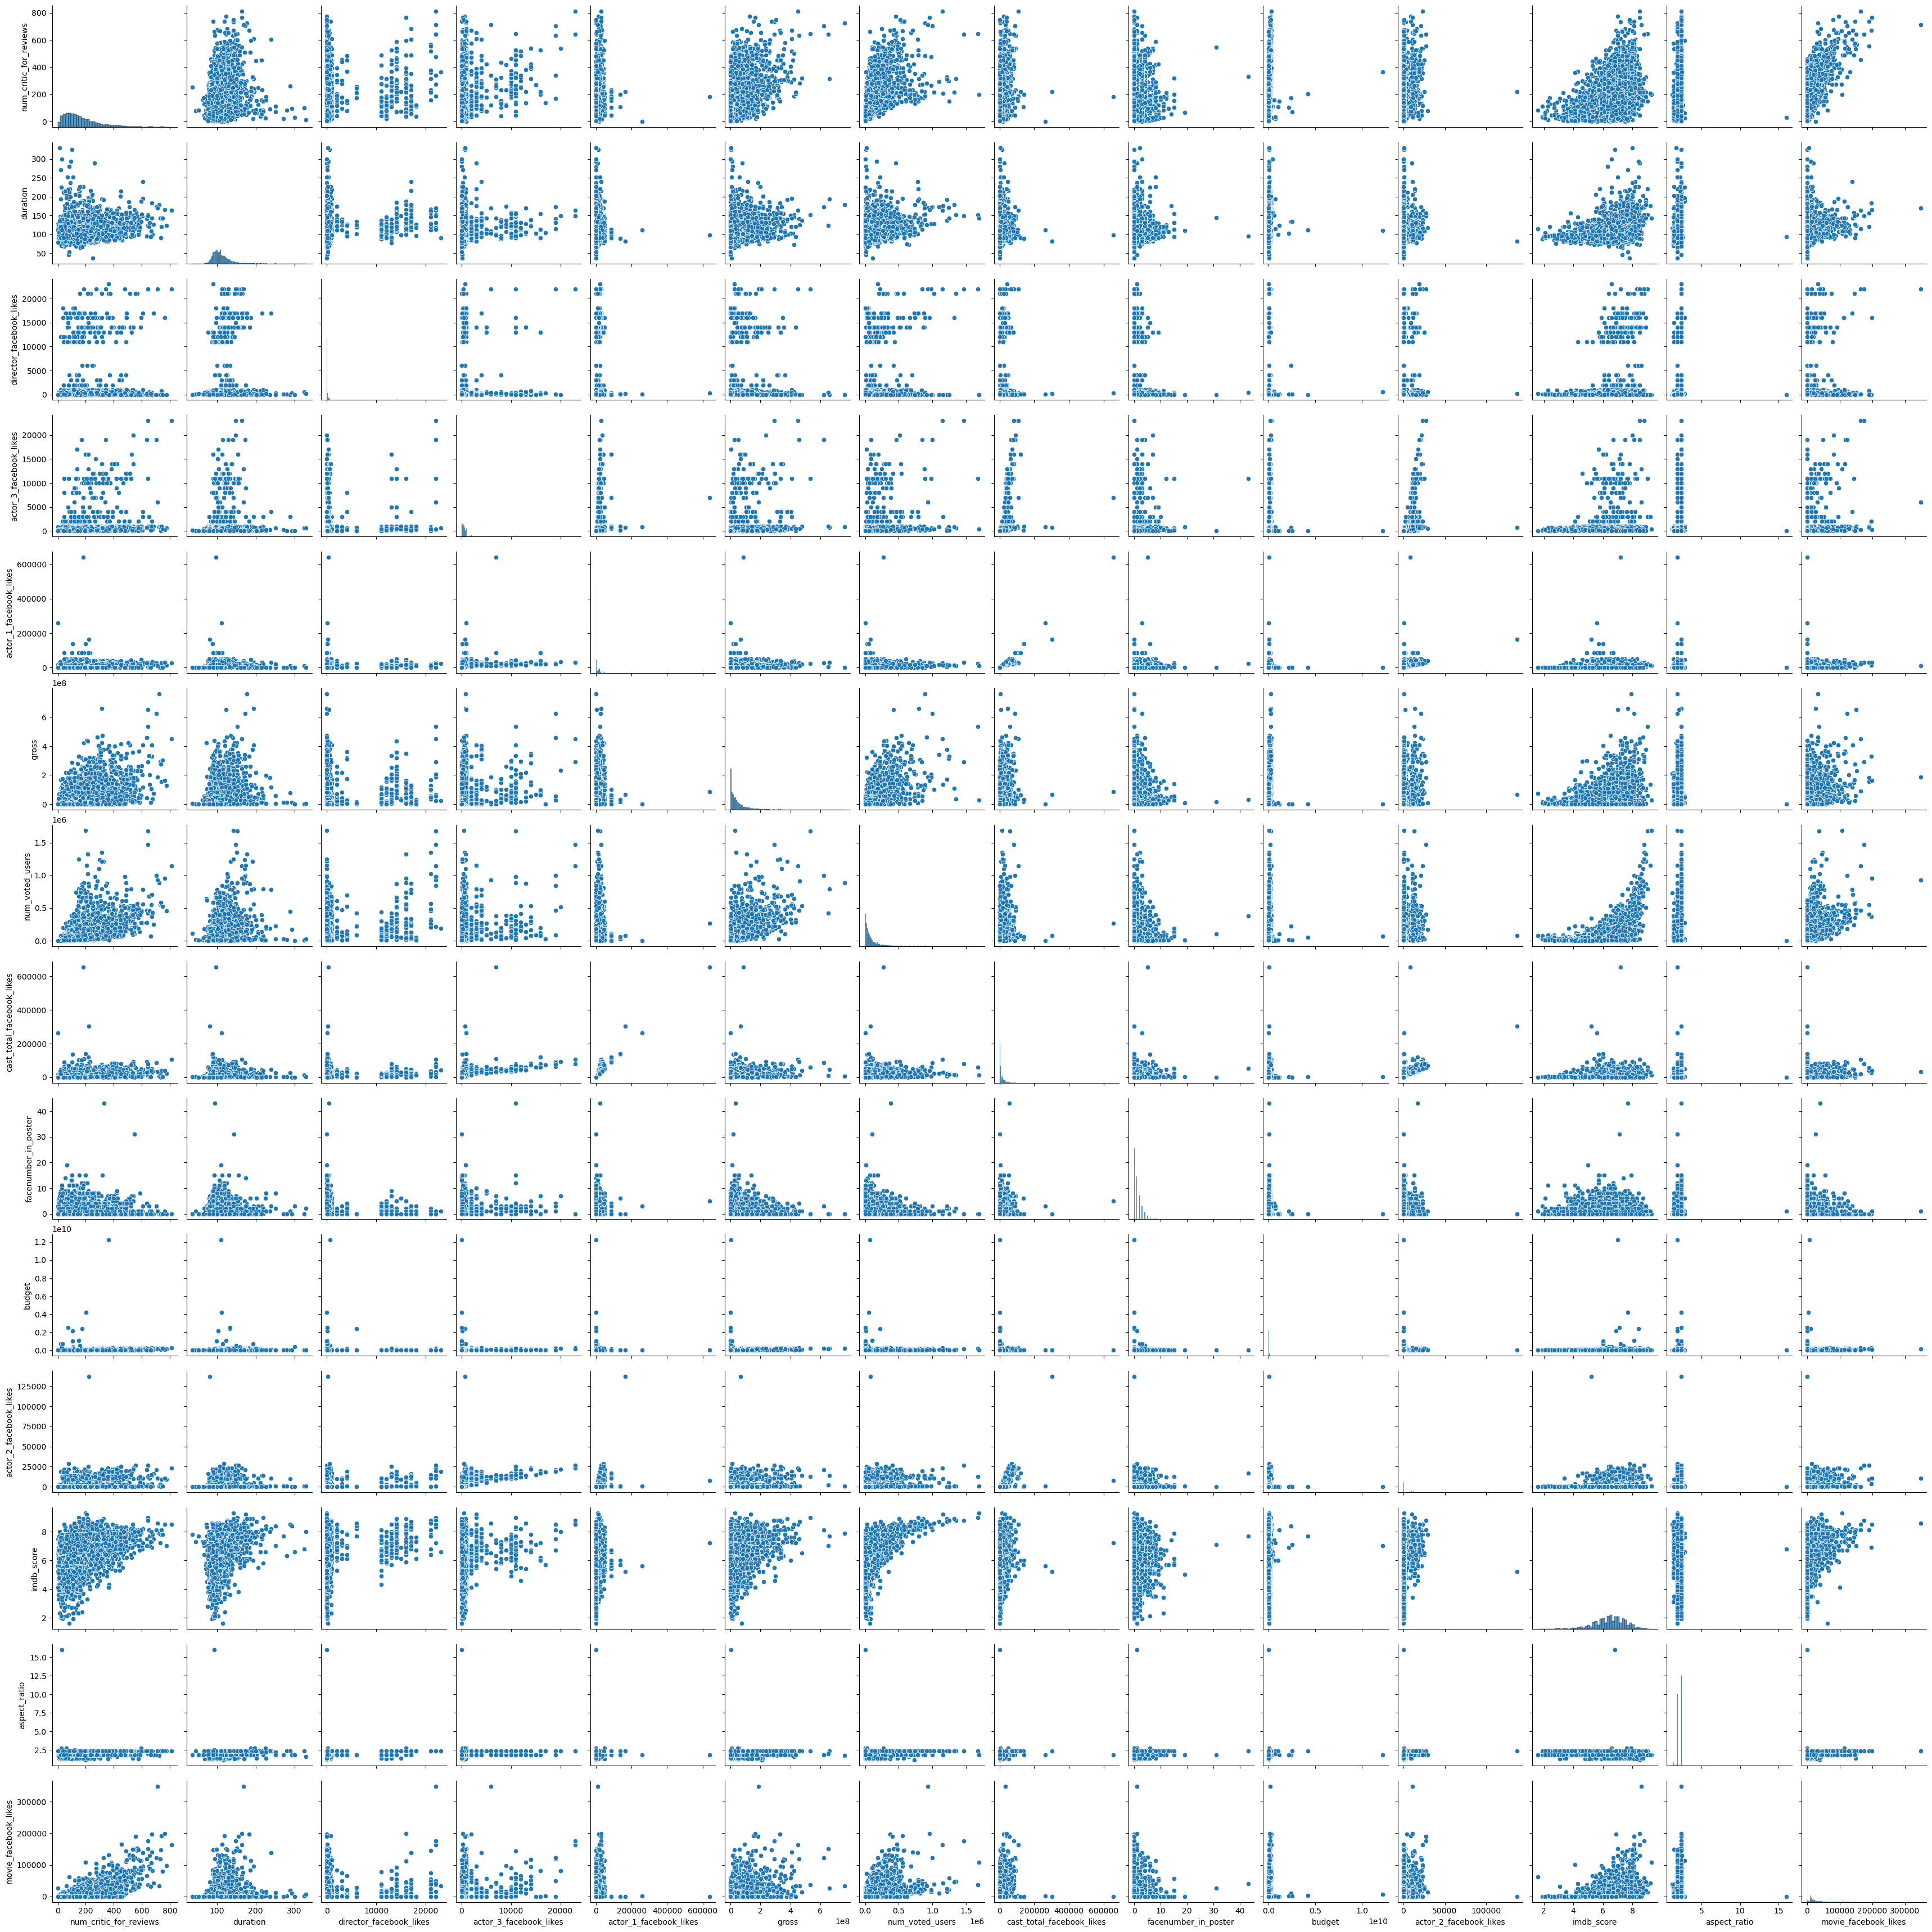

In [56]:
sns.pairplot(df)

In [26]:
df.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count             3723.000000  3723.000000              3723.000000   
mean               167.040559   110.263497               809.864357   
std                123.345135    22.678325              3076.624412   
min                  2.000000    37.000000                 0.000000   
25%                 77.000000    96.000000                11.000000   
50%                138.000000   106.000000                63.000000   
75%                224.000000   120.000000               235.000000   
max                813.000000   330.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             3723.000000             3723.000000  3.723000e+03   
mean               765.010207             7743.335751  5.248034e+07   
std               1868.841589            15557.953218  6.980333e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                194.000000              744.500000  8.124330e+06   
50%                436.000000             1000.000000  3.005003e+07   
75%                690.000000            13000.000000  6.690181e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     3.723000e+03                3723.000000           3723.000000   
mean      1.055543e+05               11494.966694              1.376041   
std       1.515651e+05               19113.274232              2.045134   
min       9.100000e+01                   0.000000              0.000000   
25%       1.959850e+04                1907.000000              0.000000   
50%       5.397700e+04                4050.000000              1.000000   
75%       1.285240e+05               16232.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

             budget  actor_2_facebook_likes   imdb_score  aspect_ratio  \
count  3.723000e+03             3723.000000  3723.000000   3723.000000   
mean   4.623049e+07             2009.926403     6.465673      2.110682   
std    2.269511e+08             4531.151446     1.053644      0.353879   
min    2.180000e+02                0.000000     1.600000      1.180000   
25%    1.000000e+07              383.500000     5.900000      1.850000   
50%    2.500000e+07              683.000000     6.600000      2.350000   
75%    5.000000e+07              975.000000     7.200000      2.350000   
max    1.221550e+10           137000.000000     9.300000     16.000000   

       movie_facebook_likes  
count           3723.000000  
mean            9299.497717  
std            21426.654643  
min                0.000000  
25%                0.000000  
50%              226.000000  
75%            11000.000000  
max           349000.000000

In [27]:
df

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
5     Color     Andrew Stanton                   462.0     132.0   
...     ...                ...                     ...       ...   
5026  Color    Olivier Assayas                    81.0     110.0   
5027  Color       Jafar Panahi                    64.0      90.0   
5033  Color      Shane Carruth                   143.0      77.0   
5035  Color   Robert Rodriguez                    56.0      81.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes       actor_2_name  \
0                         0.0                   855.0   Joel David Moore   
1                       563.0                  1000.0      Orlando Bloom   
2                         0.0                   161.0       Rory Kinnear   
3                     22000.0                 23000.0     Christian Bale   
5                       475.0                   530.0    Samantha Morton   
...                       ...                     ...                ...   
5026                    107.0                    45.0     Béatrice Dalle   
5027                    397.0                     0.0  Nargess Mamizadeh   
5033                    291.0                     8.0     David Sullivan   
5035                      0.0                     6.0    Peter Marquardt   
5042                     16.0                    16.0   Brian Herzlinger   

      actor_1_facebook_likes        gross  \
0                     1000.0  760505847.0   
1                    40000.0  309404152.0   
2                    11000.0  200074175.0   
3                    27000.0  448130642.0   
5                      640.0   73058679.0   
...                      ...          ...   
5026                   576.0     136007.0   
5027                     5.0     673780.0   
5033                   291.0     424760.0   
5035                   121.0    2040920.0   
5042                    86.0      85222.0   

                                   genres             actor_1_name  \
0         Action|Adventure|Fantasy|Sci-Fi              CCH Pounder   
1                Action|Adventure|Fantasy              Johnny Depp   
2               Action|Adventure|Thriller          Christoph Waltz   
3                         Action|Thriller                Tom Hardy   
5                 Action|Adventure|Sci-Fi             Daryl Sabara   
...                                   ...                      ...   
5026                  Drama|Music|Romance            Maggie Cheung   
5027                                Drama  Fereshteh Sadre Orafaiy   
5033                Drama|Sci-Fi|Thriller            Shane Carruth   
5035  Action|Crime|Drama|Romance|Thriller          Carlos Gallardo   
5042                          Documentary              John August   

                                    movie_title  num_voted_users  \
0                                       Avatar            886204   
1     Pirates of the Caribbean: At World's End            471220   
2                                      Spectre            275868   
3                        The Dark Knight Rises           1144337   
5                                  John Carter            212204   
...                                         ...              ...   
5026                                     Clean              3924   
5027                                The Circle              4555   
5033                                    Primer             72639   
5035                               El Mariachi             52055   
5042                         My Date with Drew              4285   

      cast_total_facebook_likes          actor_3_name  facenumber_in_poster  

In [28]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [51]:
df.drop(['color', 'num_critic_for_reviews','director_facebook_likes', 'actor_3_facebook_likes','actor_1_facebook_likes','num_voted_users', 'cast_total_facebook_likes','facenumber_in_poster','plot_keywords','movie_imdb_link', 'num_user_for_reviews','actor_2_facebook_likes','movie_facebook_likes'],axis=1,inplace=True)

In [52]:
df["title_year"]=pd.to_datetime(df["title_year"]).dt.year

In [53]:
df['profit/loss']=df['gross']-df['budget']

In [54]:
df['genres']=df["genres"].str.split("|", expand=True).iloc[:, 0]


In [55]:
df

director_name  duration       actor_2_name        gross  \
0         James Cameron     178.0   Joel David Moore  760505847.0   
1        Gore Verbinski     169.0      Orlando Bloom  309404152.0   
2            Sam Mendes     148.0       Rory Kinnear  200074175.0   
3     Christopher Nolan     164.0     Christian Bale  448130642.0   
5        Andrew Stanton     132.0    Samantha Morton   73058679.0   
...                 ...       ...                ...          ...   
5026    Olivier Assayas     110.0     Béatrice Dalle     136007.0   
5027       Jafar Panahi      90.0  Nargess Mamizadeh     673780.0   
5033      Shane Carruth      77.0     David Sullivan     424760.0   
5035   Robert Rodriguez      81.0    Peter Marquardt    2040920.0   
5042           Jon Gunn      90.0   Brian Herzlinger      85222.0   

           genres             actor_1_name  \
0          Action              CCH Pounder   
1          Action              Johnny Depp   
2          Action          Christoph Waltz   
3          Action                Tom Hardy   
5          Action             Daryl Sabara   
...           ...                      ...   
5026        Drama            Maggie Cheung   
5027        Drama  Fereshteh Sadre Orafaiy   
5033        Drama            Shane Carruth   
5035       Action          Carlos Gallardo   
5042  Documentary              John August   

                                    movie_title          actor_3_name  \
0                                       Avatar              Wes Studi   
1     Pirates of the Caribbean: At World's End         Jack Davenport   
2                                      Spectre       Stephanie Sigman   
3                        The Dark Knight Rises   Joseph Gordon-Levitt   
5                                  John Carter           Polly Walker   
...                                         ...                   ...   
5026                                     Clean           Don McKellar   
5027                                The Circle       Mojgan Faramarzi   
5033                                    Primer           Casey Gooden   
5035                               El Mariachi         Consuelo Gómez   
5042                         My Date with Drew               Jon Gunn   

     language country content_rating       budget  title_year  imdb_score  \
0     English     USA          PG-13  237000000.0        1970         7.9   
1     English     USA          PG-13  300000000.0        1970         7.1   
2     English      UK          PG-13  245000000.0        1970         6.8   
3     English     USA          PG-13  250000000.0        1970         8.5   
5     English     USA          PG-13  263700000.0        1970         6.6   
...       ...     ...            ...          ...         ...         ...   
5026   French  France              R       4500.0        1970         6.9   
5027  Persian    Iran      Not Rated      10000.0        1970         7.5   
5033  English     USA          PG-13       7000.0        1970         7.0   
5035  Spanish     USA              R       7000.0        1970         6.9   
5042  English     USA             PG       1100.0        1970         6.6   

      aspect_ratio  profit/loss  
0             1.78  523505847.0  
1             2.35    9404152.0  
2             2.35  -44925825.0  
3             2.35  198130642.0  
5             2.35 -190641321.0  
...            ...          ...  
5026          2.35     131507.0  
5027          1.85     663780.0  
5033          1.85     417760.0  
5035          1.37    2033920.0  
5042          1.85      84122.0  

[3723 rows x 16 columns]

# Approach

I have gone through the dataset and understood all the given columns. Then I have observed that there are a total of 28 Columns

and 5043 Rows. This dataset consists of unwanted columns, Null values and Duplicate rows. So, I have decided to Clean this dataset

thoroughly.

1) First, I noticed that there were many Null Values present in the dataset.I droped the null values from the dataset.


2) Secondly, I also deleted the duplicate rows present in the dataset.


1) Finally, I have deleted the columns which have no relation to our project and do not provide any valuable insights. 

In the end, I only left with 16 Columns which are director_name, duration, actor_2_name, gross, genres,actor_1_name,

movie_title, actor_3_name, language, country,content_rating, budget, title_year, imdb_score, aspect_ratio.


# Cleaned Dataset

In [56]:
df.to_csv(r"C:\Users\SKAN\Desktop\Raajee\imdb.csv")


# A. Movie Genre Analysis: Analyze the distribution of movie genres and their impact on the IMDB score.
    
Task: Determine the most common genres of movies in the dataset. Then, for each genre, calculate descriptive statistics
    
(mean, median, mode, range, variance, standard deviation) of the IMDB scores.



In [57]:
df1=df.copy()

In [58]:
df1

director_name  duration       actor_2_name        gross  \
0         James Cameron     178.0   Joel David Moore  760505847.0   
1        Gore Verbinski     169.0      Orlando Bloom  309404152.0   
2            Sam Mendes     148.0       Rory Kinnear  200074175.0   
3     Christopher Nolan     164.0     Christian Bale  448130642.0   
5        Andrew Stanton     132.0    Samantha Morton   73058679.0   
...                 ...       ...                ...          ...   
5026    Olivier Assayas     110.0     Béatrice Dalle     136007.0   
5027       Jafar Panahi      90.0  Nargess Mamizadeh     673780.0   
5033      Shane Carruth      77.0     David Sullivan     424760.0   
5035   Robert Rodriguez      81.0    Peter Marquardt    2040920.0   
5042           Jon Gunn      90.0   Brian Herzlinger      85222.0   

           genres             actor_1_name  \
0          Action              CCH Pounder   
1          Action              Johnny Depp   
2          Action          Christoph Waltz   
3          Action                Tom Hardy   
5          Action             Daryl Sabara   
...           ...                      ...   
5026        Drama            Maggie Cheung   
5027        Drama  Fereshteh Sadre Orafaiy   
5033        Drama            Shane Carruth   
5035       Action          Carlos Gallardo   
5042  Documentary              John August   

                                    movie_title          actor_3_name  \
0                                       Avatar              Wes Studi   
1     Pirates of the Caribbean: At World's End         Jack Davenport   
2                                      Spectre       Stephanie Sigman   
3                        The Dark Knight Rises   Joseph Gordon-Levitt   
5                                  John Carter           Polly Walker   
...                                         ...                   ...   
5026                                     Clean           Don McKellar   
5027                                The Circle       Mojgan Faramarzi   
5033                                    Primer           Casey Gooden   
5035                               El Mariachi         Consuelo Gómez   
5042                         My Date with Drew               Jon Gunn   

     language country content_rating       budget  title_year  imdb_score  \
0     English     USA          PG-13  237000000.0        1970         7.9   
1     English     USA          PG-13  300000000.0        1970         7.1   
2     English      UK          PG-13  245000000.0        1970         6.8   
3     English     USA          PG-13  250000000.0        1970         8.5   
5     English     USA          PG-13  263700000.0        1970         6.6   
...       ...     ...            ...          ...         ...         ...   
5026   French  France              R       4500.0        1970         6.9   
5027  Persian    Iran      Not Rated      10000.0        1970         7.5   
5033  English     USA          PG-13       7000.0        1970         7.0   
5035  Spanish     USA              R       7000.0        1970         6.9   
5042  English     USA             PG       1100.0        1970         6.6   

      aspect_ratio  profit/loss  
0             1.78  523505847.0  
1             2.35    9404152.0  
2             2.35  -44925825.0  
3             2.35  198130642.0  
5             2.35 -190641321.0  
...            ...          ...  
5026          2.35     131507.0  
5027          1.85     663780.0  
5033          1.85     417760.0  
5035          1.37    2033920.0  
5042          1.85      84122.0  

[3723 rows x 16 columns]

In [184]:
grouped = df1.groupby('genres')['imdb_score'].agg(['count','mean','median','max','min','var','std']).reset_index()

grouped

genres  count      mean  median  max  min       var       std
0        Action    951  6.289905    6.30  9.0  2.1  1.065372  1.032168
1     Adventure    366  6.558470    6.70  8.6  2.3  1.262380  1.123557
2     Animation     45  6.740000    7.00  8.0  4.5  0.942455  0.970801
3     Biography    204  7.158824    7.20  8.9  4.5  0.485488  0.696770
4        Comedy    984  6.169004    6.30  8.8  1.9  1.055223  1.027241
5         Crime    253  6.936364    7.00  9.3  3.3  0.757720  0.870471
6   Documentary     26  6.796154    7.45  8.5  1.6  2.946785  1.716620
7         Drama    659  6.831866    6.90  8.8  2.1  0.824029  0.907760
8        Family      3  6.500000    5.90  7.9  5.7  1.480000  1.216553
9       Fantasy     37  6.281081    6.50  7.9  4.3  0.799354  0.894066
10       Horror    159  5.842138    5.90  8.5  2.3  1.059795  1.029464
11      Musical      2  6.750000    6.75  7.2  6.3  0.405000  0.636396
12      Mystery     23  6.652174    6.70  8.5  3.3  1.193518  1.092482
13      Romance      1  7.100000    7.10  7.1  7.1       NaN       NaN
14       Sci-Fi      7  6.628571    6.40  8.2  5.0  1.225714  1.107120
15     Thriller      1  4.800000    4.80  4.8  4.8       NaN       NaN
16      Western      2  8.100000    8.10  8.9  7.3  1.280000  1.131371

In [168]:
df2=df1.groupby('genres')['imdb_score'].count().reset_index().sort_values(by='imdb_score',ascending=False)
df2

genres  imdb_score
4        Comedy         984
0        Action         951
7         Drama         659
1     Adventure         366
5         Crime         253
3     Biography         204
10       Horror         159
2     Animation          45
9       Fantasy          37
6   Documentary          26
12      Mystery          23
14       Sci-Fi           7
8        Family           3
11      Musical           2
16      Western           2
13      Romance           1
15     Thriller           1

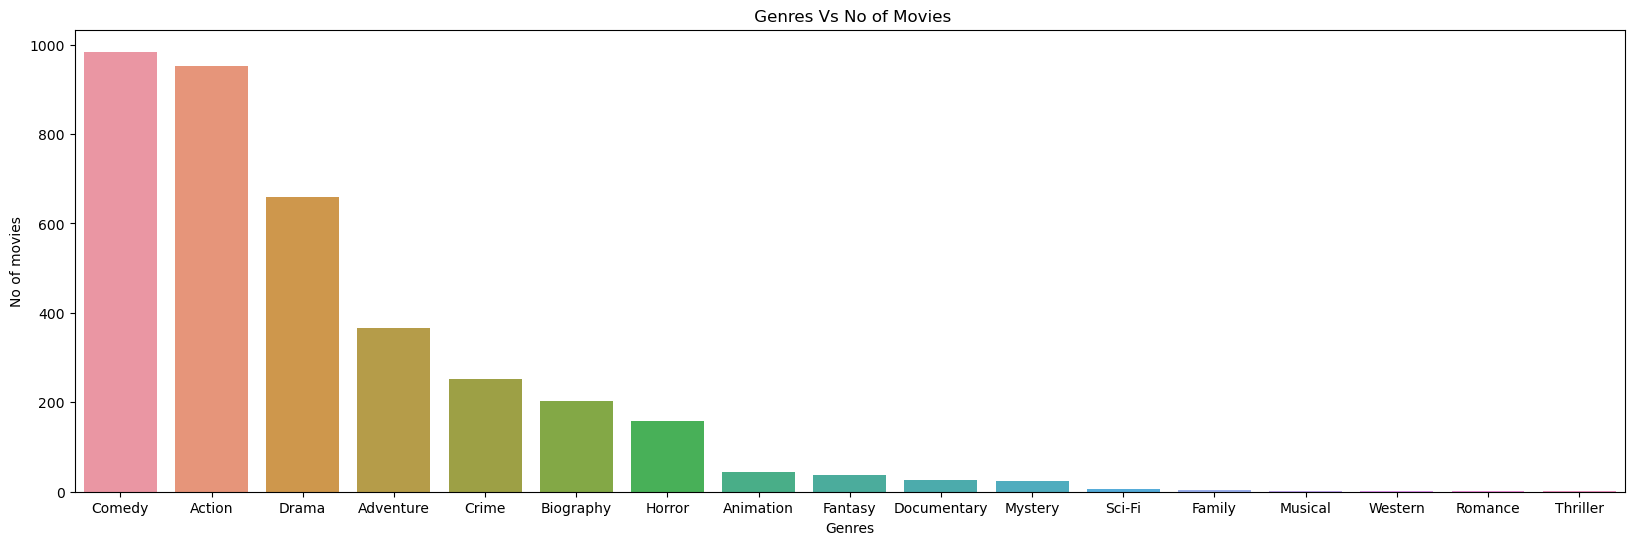

In [173]:
plt.figure(figsize=(20,6))
sns.barplot(x="genres", y="imdb_score", data=df2,orient="v")
plt.title(" Genres Vs No of Movies")
plt.xlabel("Genres")
plt.ylabel("No of movies")
plt.show()

# B. Movie Duration Analysis: Analyze the distribution of movie durations and its impact on the IMDB score.
    
Task: Analyze the distribution of movie durations and identify the relationship between movie duration and IMDB score.


In [298]:
grouped1 = df1.groupby('duration')['imdb_score'].agg(['mean','median','std'])
grouped1

mean  median  std
duration                   
37.0       7.8     7.8  NaN
45.0       7.3     7.3  NaN
53.0       7.7     7.7  NaN
63.0       7.3     7.3  NaN
66.0       7.2     7.2  NaN
...        ...     ...  ...
289.0      8.5     8.5  NaN
293.0      8.4     8.4  NaN
300.0      6.6     6.6  NaN
325.0      6.8     6.8  NaN
330.0      8.0     8.0  NaN

[151 rows x 3 columns]

In [301]:
grouped1['std']=grouped1['std'].dropna(inplace=True)

Text(0.5, 1.0, 'Movie Duration Vs Imdb_Score')

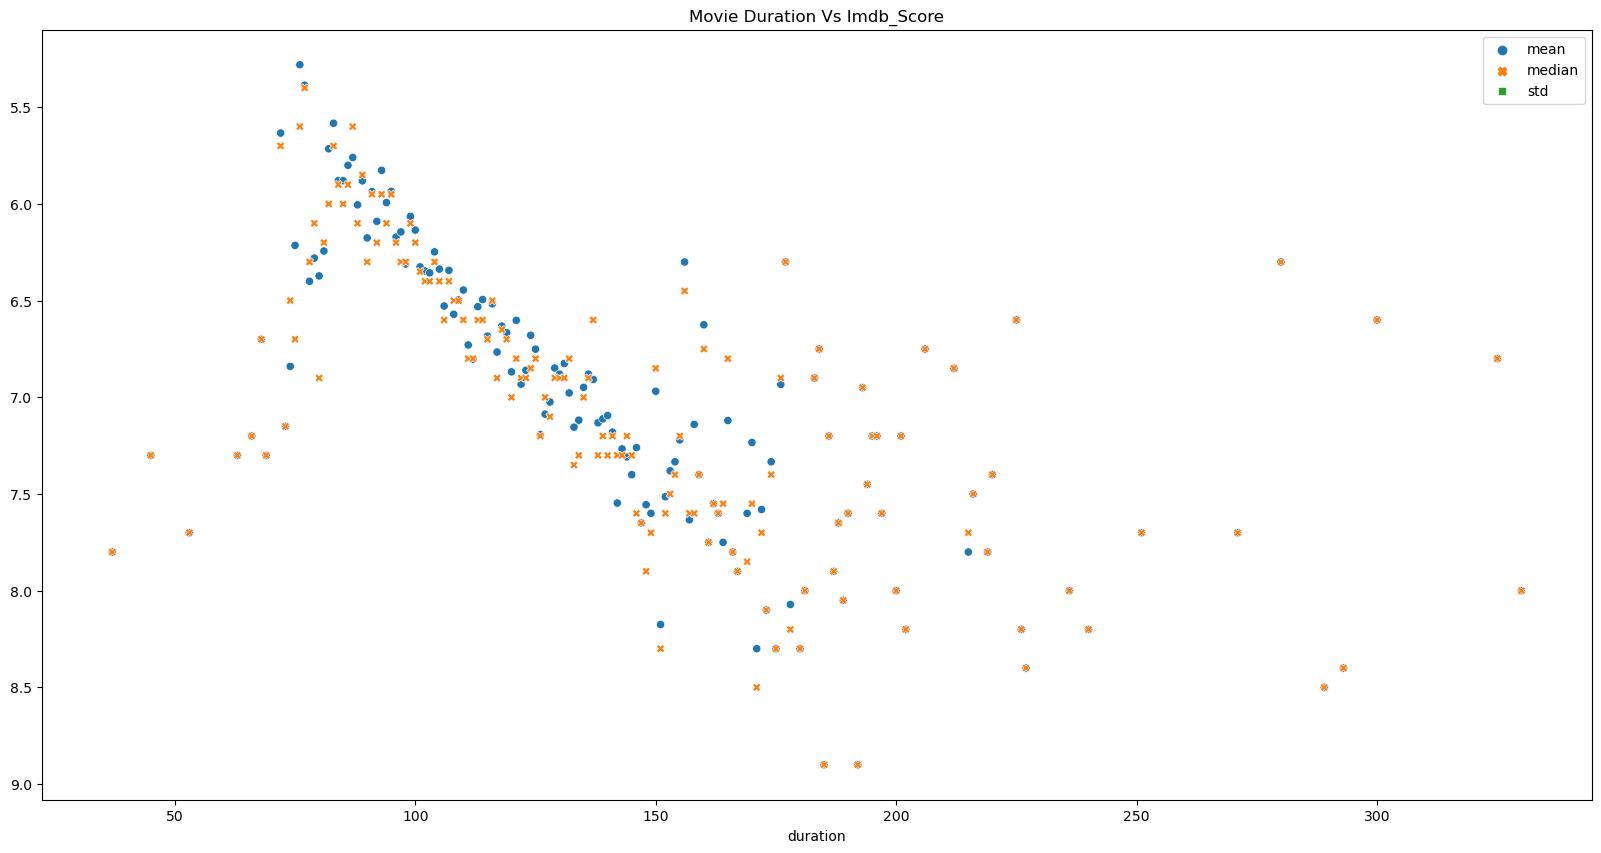

In [303]:
plt.figure(figsize=(20,10))
sns.scatterplot(grouped1)
plt.title("Movie Duration Vs Imdb_Score")

# C. Language Analysis: Situation: Examine the distribution of movies based on their language.
        
Task: Determine the most common languages used in movies and analyze their impact on the IMDB 
    
score using descriptive statistics.


In [189]:
df1.columns

Index(['director_name', 'duration', 'actor_2_name', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'actor_3_name', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'imdb_score', 'aspect_ratio'],
      dtype='object')

In [209]:
grouped2 = df1.groupby('language')['imdb_score'].agg(['count','mean','median','max','min','var','std']).reset_index().sort_values(by='count',ascending=False)
grouped2

language  count      mean  median  max  min       var       std
9      English   3566  6.427510    6.50  9.3  1.6  1.098101  1.047903
11      French     34  7.355882    7.30  8.4  5.8  0.269813  0.519435
30     Spanish     23  7.082609    7.20  8.2  5.2  0.740593  0.860577
21    Mandarin     14  7.021429    7.25  7.9  5.6  0.586429  0.765786
18    Japanese     10  7.660000    8.00  8.7  6.0  0.980444  0.990174
12      German     10  7.770000    7.80  8.5  6.1  0.506778  0.711883
17     Italian      7  7.185714    7.00  8.9  5.3  1.334762  1.155319
4    Cantonese      7  7.342857    7.30  7.8  6.7  0.122857  0.350510
27  Portuguese      5  7.760000    8.00  8.7  6.1  0.958000  0.978775
14       Hindi      5  7.220000    7.40  8.0  6.0  0.642000  0.801249
20      Korean      5  7.700000    7.70  8.4  7.0  0.325000  0.570088
25   Norwegian      4  7.150000    7.30  7.6  6.4  0.330000  0.574456
31        Thai      3  6.633333    6.60  7.1  6.2  0.203333  0.450925
6       Danish      3  7.900000    8.10  8.3  7.3  0.280000  0.529150
26     Persian      3  8.133333    8.40  8.5  7.5  0.303333  0.550757
8        Dutch      3  7.566667    7.80  7.8  7.1  0.163333  0.404145
0   Aboriginal      2  6.950000    6.95  7.5  6.4  0.605000  0.777817
7         Dari      2  7.500000    7.50  7.6  7.4  0.020000  0.141421
16  Indonesian      2  7.900000    7.90  8.2  7.6  0.180000  0.424264
1       Arabic      1  7.200000    7.20  7.2  7.2       NaN       NaN
32  Vietnamese      1  7.400000    7.40  7.4  7.4       NaN       NaN
2      Aramaic      1  7.100000    7.10  7.1  7.1       NaN       NaN
3      Bosnian      1  4.300000    4.30  4.3  4.3       NaN       NaN
29     Russian      1  6.500000    6.50  6.5  6.5       NaN       NaN
28    Romanian      1  7.900000    7.90  7.9  7.9       NaN       NaN
5        Czech      1  7.400000    7.40  7.4  7.4       NaN       NaN
10    Filipino      1  6.700000    6.70  6.7  6.7       NaN       NaN
24        None      1  8.500000    8.50  8.5  8.5       NaN       NaN
23   Mongolian      1  7.300000    7.30  7.3  7.3       NaN       NaN
22        Maya      1  7.800000    7.80  7.8  7.8       NaN       NaN
13      Hebrew      1  8.000000    8.00  8.0  8.0       NaN       NaN
15   Hungarian      1  7.100000    7.10  7.1  7.1       NaN       NaN
19      Kazakh      1  6.000000    6.00  6.0  6.0       NaN       NaN
33        Zulu      1  7.300000    7.30  7.3  7.3       NaN       NaN

In [192]:
df3=df1.groupby('language')['imdb_score'].count().reset_index().sort_values(by='imdb_score',ascending=False).head(10)
df3

language  imdb_score
9      English        3566
11      French          34
30     Spanish          23
21    Mandarin          14
18    Japanese          10
12      German          10
17     Italian           7
4    Cantonese           7
27  Portuguese           5
14       Hindi           5

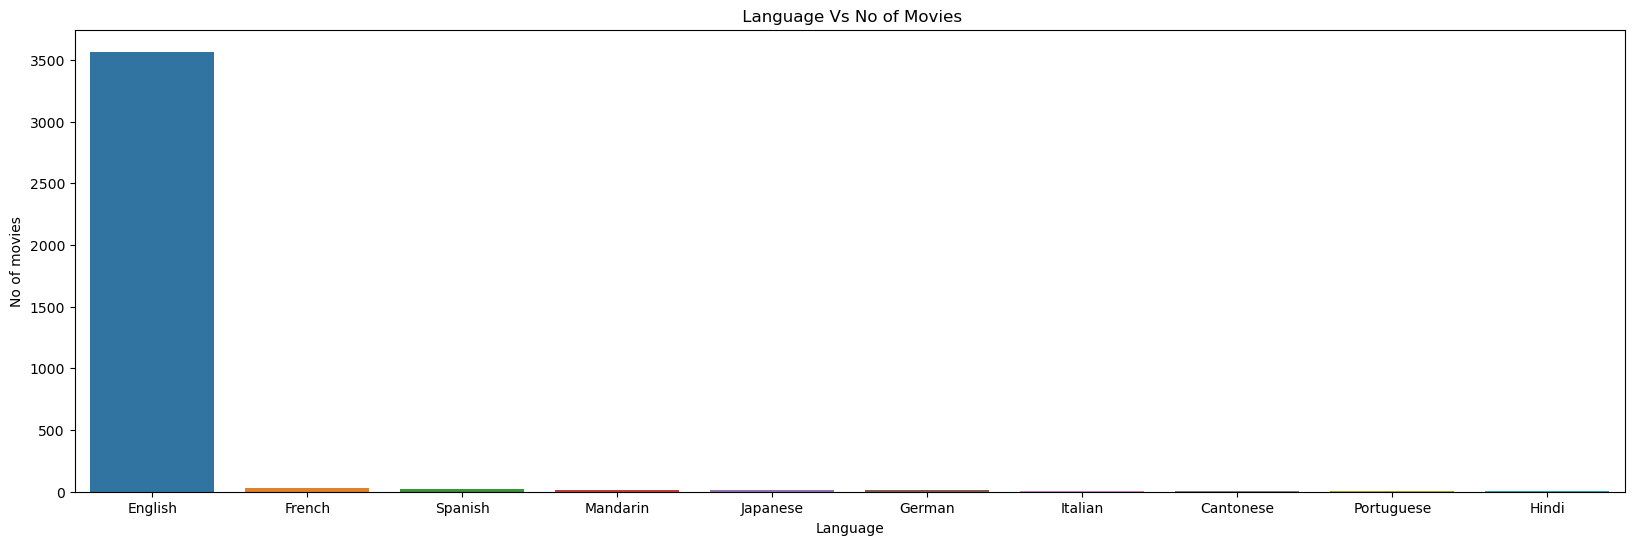

In [193]:
plt.figure(figsize=(20,6))
sns.barplot(x="language", y="imdb_score", data=df3,orient="v")
plt.title(" Language Vs No of Movies")
plt.xlabel("Language")
plt.ylabel("No of movies")
plt.show()

# D. Director Analysis: Influence of directors on movie ratings.
    
Task: Identify the top directors based on their average IMDB score and analyze their contribution to the success of
    
movies using percentile calculations.



In [293]:
grouped3 = df1.groupby('director_name')['imdb_score'].agg(['count','mean']).reset_index().sort_values(by='count',ascending=False)
grouped3

director_name  count      mean
1492   Steven Spielberg     25  7.544000
1645        Woody Allen     19  7.000000
262      Clint Eastwood     19  7.205263
1313       Ridley Scott     17  7.070588
1491  Steven Soderbergh     16  6.706250
...                 ...    ...       ...
692       Jesse Vaughan      1  4.500000
691        Jesse Peretz      1  6.400000
688          Jerry Zaks      1  6.700000
686      Jerome Robbins      1  7.600000
1658   Émile Gaudreault      1  6.700000

[1659 rows x 3 columns]

In [307]:
df4=df1.groupby('director_name')['imdb_score'].count().reset_index().sort_values(by='imdb_score',ascending=False).head(20)
df4

director_name  imdb_score
1492   Steven Spielberg          25
1645        Woody Allen          19
262      Clint Eastwood          19
1313       Ridley Scott          17
1491  Steven Soderbergh          16
1008    Martin Scorsese          16
1536         Tim Burton          16
1281       Renny Harlin          15
1443          Spike Lee          15
1350    Robert Zemeckis          13
1343   Robert Rodriguez          13
1038        Michael Bay          13
1166       Oliver Stone          13
1368         Ron Howard          13
108      Barry Levinson          13
728     Joel Schumacher          12
1398          Sam Raimi          12
739      John Carpenter          12
1589         Tony Scott          12
1325         Rob Reiner          11

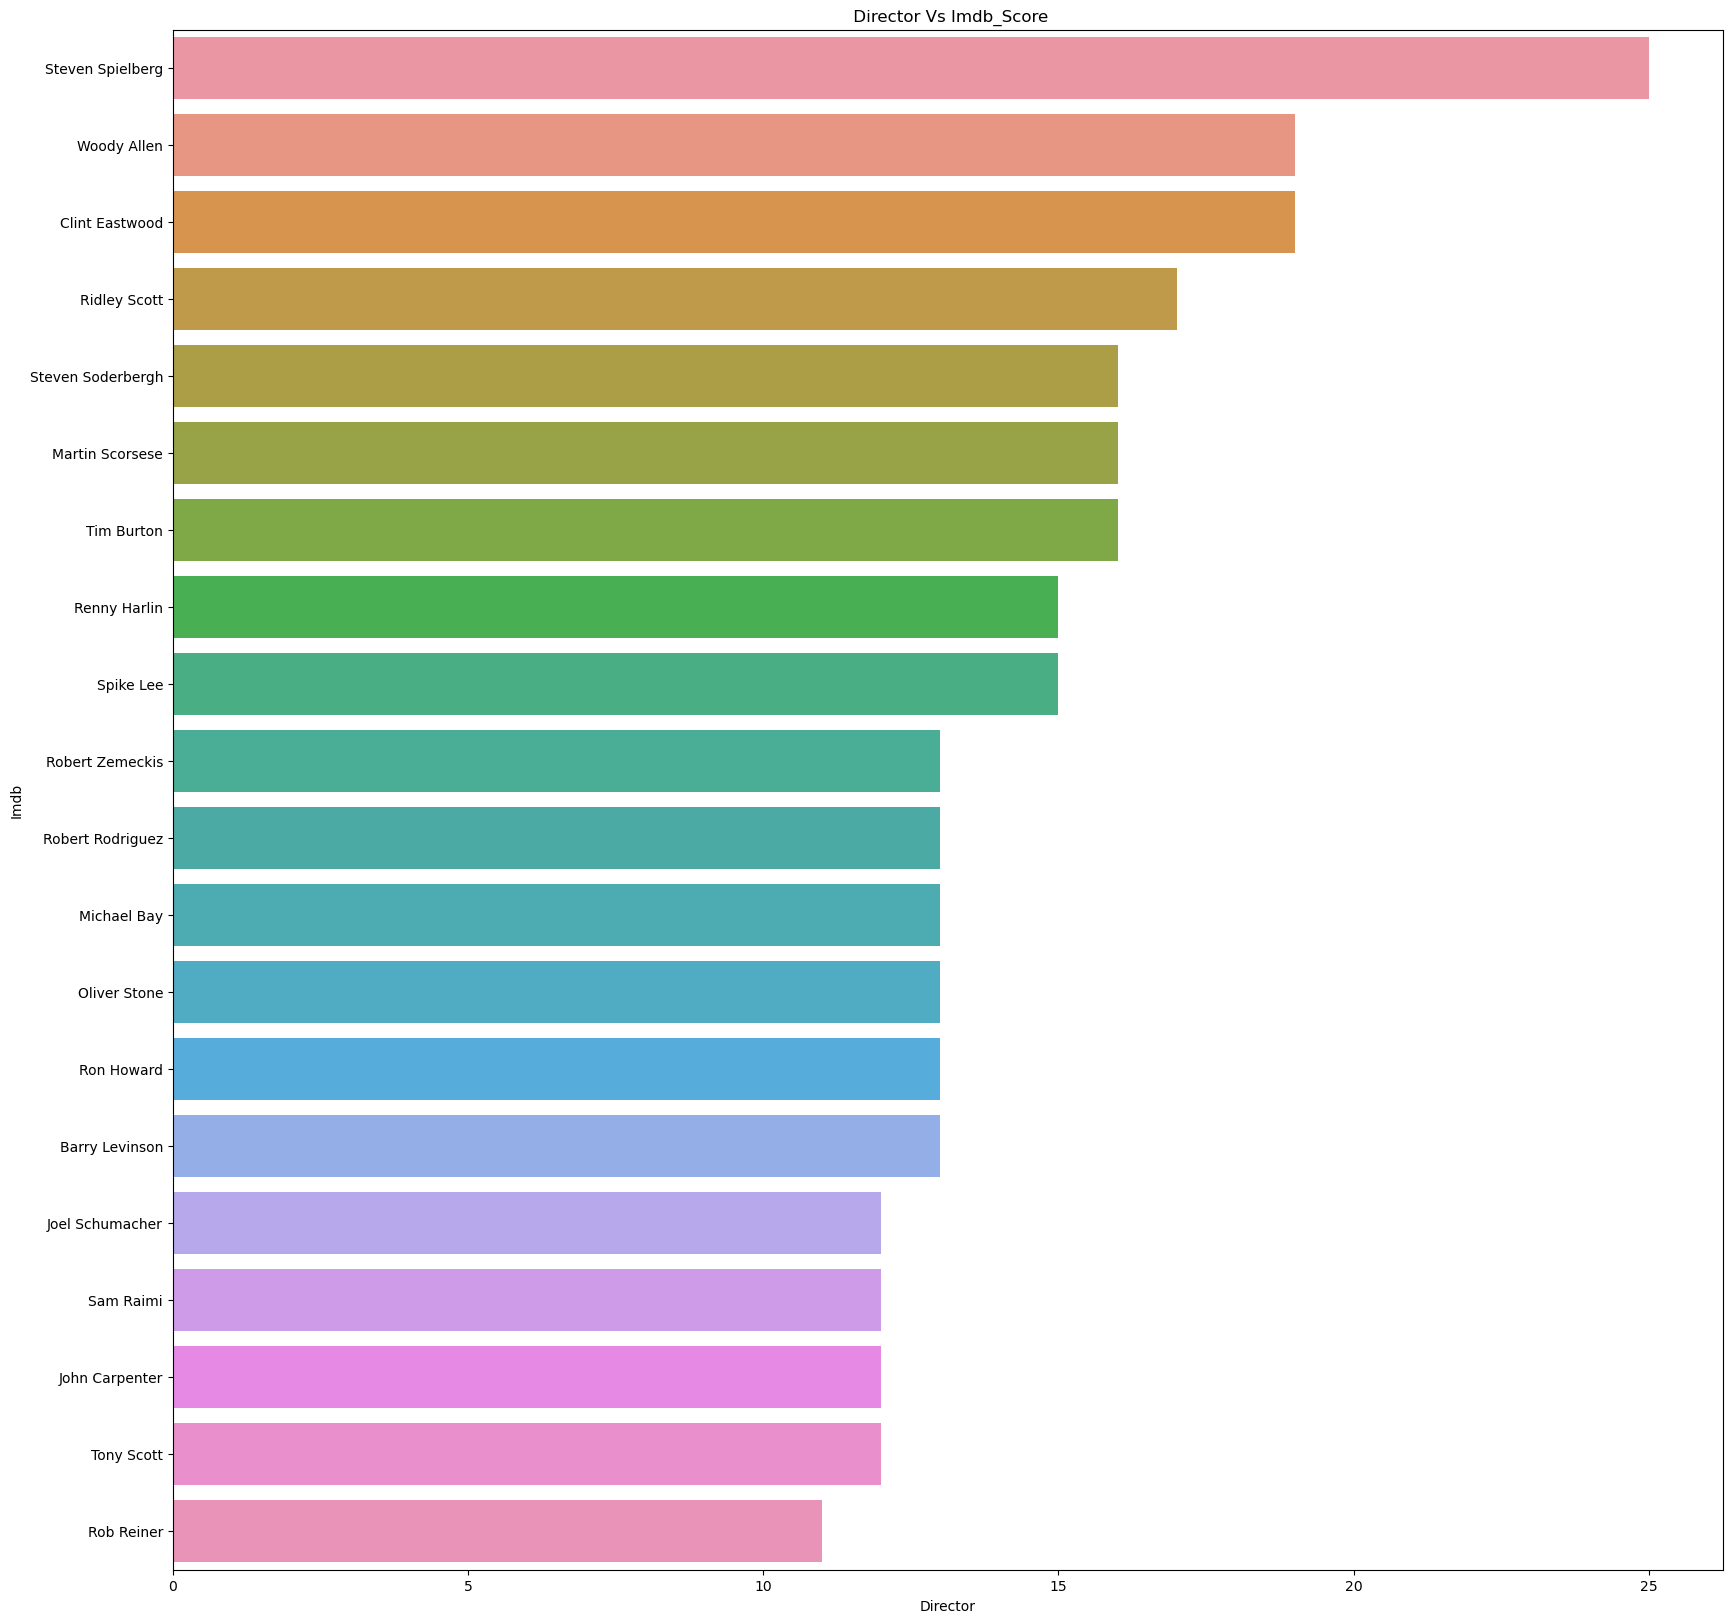

In [310]:
plt.figure(figsize=(20,20))
sns.barplot(y="director_name", x="imdb_score", data=df4)
plt.title(" Director Vs Imdb_Score")
plt.xlabel("Director")
plt.ylabel("Imdb")
plt.show()

# E. Budget Analysis: Explore the relationship between movie budgets and their financial success.
    
Task: Analyze the correlation between movie budgets and gross earnings, and identify the movies with the highest profit margin.



In [290]:
df5=df1.groupby('movie_title')['budget','gross'].sum().reset_index()
df5['profit']=df5['gross']-df5['budget']
df5=df5.sort_values(by='profit',ascending=False).head(20)
df5


movie_title       budget  \
281                                          Avatar   237000000.0   
1446                                 Jurassic World   150000000.0   
3370                                        Titanic   200000000.0   
2461             Star Wars: Episode IV - A New Hope    11000000.0   
841                      E.T. the Extra-Terrestrial    10500000.0   
2625                                   The Avengers   220000000.0   
2992                                  The Lion King    45000000.0   
2942                                The Jungle Book   350000000.0   
2458      Star Wars: Episode I - The Phantom Menace   115000000.0   
2750                                The Dark Knight   185000000.0   
2898                               The Hunger Games    78000000.0   
3427                                       Twilight    74000000.0   
711                                        Deadpool    58000000.0   
2895                The Hunger Games: Catching Fire   130000000.0   
1445                                  Jurassic Park    63000000.0   
730                                 Despicable Me 2    76000000.0   
202                                 American Sniper    58800000.0   
961                                    Finding Nemo    94000000.0   
2329                                        Shrek 2   150000000.0   
3004  The Lord of the Rings: The Return of the King    94000000.0   

            gross       profit  
281   760505847.0  523505847.0  
1446  652177271.0  502177271.0  
3370  658672302.0  458672302.0  
2461  460935665.0  449935665.0  
841   434949459.0  424449459.0  
2625  623279547.0  403279547.0  
2992  422783777.0  377783777.0  
2942  725290282.0  375290282.0  
2458  474544677.0  359544677.0  
2750  533316061.0  348316061.0  
2898  407999255.0  329999255.0  
3427  382898950.0  308898950.0  
711   363024263.0  305024263.0  
2895  424645577.0  294645577.0  
1445  356784000.0  293784000.0  
730   368049635.0  292049635.0  
202   350123553.0  291323553.0  
961   380838870.0  286838870.0  
2329  436471036.0  286471036.0  
3004  377019252.0  283019252.0

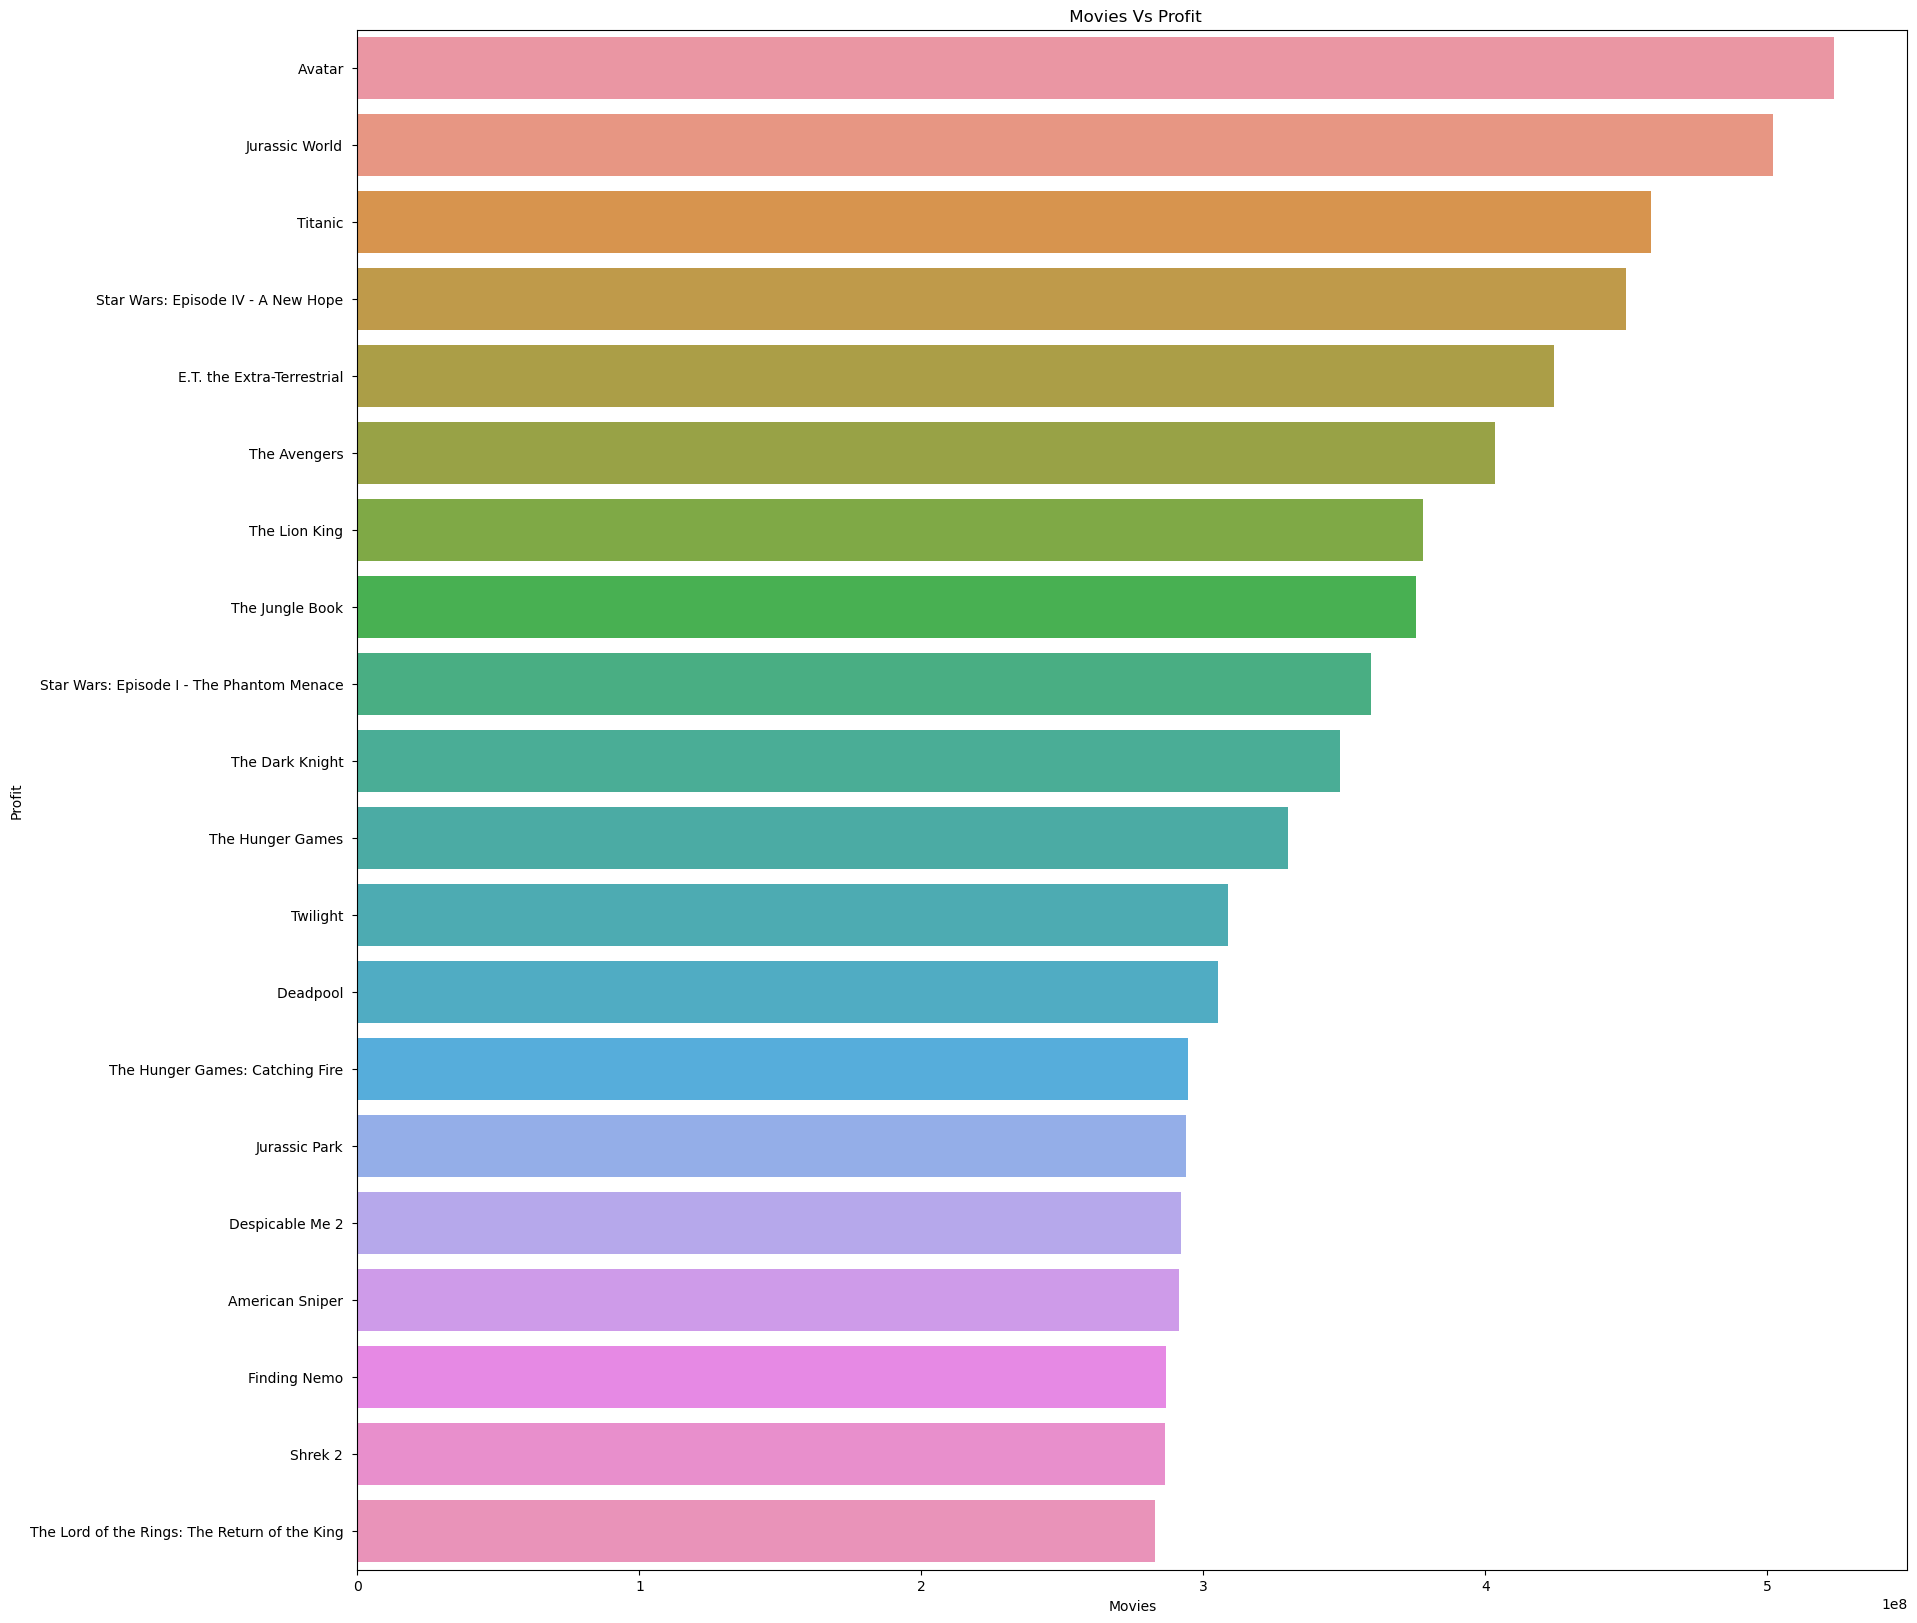

In [292]:
plt.figure(figsize=(20,20))
sns.barplot(y="movie_title", x="profit", data=df5)
plt.title(" Movies Vs Profit")
plt.xlabel("Movies")
plt.ylabel("Profit")
plt.show()